##  Imports

In [20]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

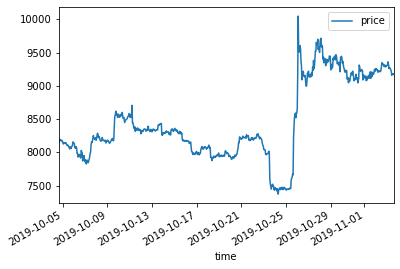

In [6]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'
result = requests.get(url)
j_bc = result.json()

df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')
df_bc.set_index('time',inplace=True)
df_bc.plot();


# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

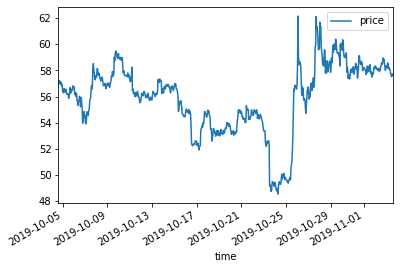

In [8]:
base = 'https://api.coingecko.com/api/v3/'
url_l = base + 'coins/litecoin/market_chart?vs_currency=usd&days=30'
result_l = requests.get(url_l)
j_lc = result_l.json()

df_lc = pd.DataFrame(j_lc['prices'], columns=['time', 'price'])
df_lc['time'] = pd.to_datetime(df_lc['time'], unit='ms')
df_lc.set_index('time',inplace=True)
df_lc.plot();

## Plot Litecoin and Dogecoin prices in a lineplot for each

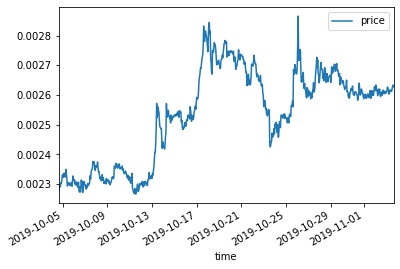

In [31]:
base = 'https://api.coingecko.com/api/v3/'
url_d = base + 'coins/dogecoin/market_chart?vs_currency=usd&days=30'
result_d = requests.get(url_d)
j_dc = result_d.json()

df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')
df_dc.set_index('time',inplace=True)
df_dc.plot()


# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [34]:
url = base + 'coins/list'
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)
data_df = df_list.iloc[:10, 0]
data_df
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_series = pd.concat(data_list)
data_series

,date_time,price,file_name
0,1546905600000,0.005860,01coin
1,1546992000000,0.006139,01coin
2,1547078400000,0.006117,01coin
3,1547164800000,0.005119,01coin
4,1547251200000,0.005229,01coin
...,...,...,...
239,1572393600000,0.891929,1irstcoin
240,1572480000000,0.863515,1irstcoin
241,1572566400000,0.906549,1irstcoin
242,1572739200000,0.893473,1irstcoin


## Make a csv called 'top_ten_report.csv' and check that it worked